In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    sum_loss = 0
    num_batches = len(dataloader)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    sum_loss /= num_batches
    return sum_loss

In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [ ]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    train_loss = []
    test_loss = []
    test_acc = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
        test_acc.append(round(acc*100, 1))
    print("Done!")

    return train_loss, test_loss, test_acc

In [ ]:
learning_rate = 1e-3
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
batch_size = 64
epochs = 5

In [ ]:
train_loss_sgd, test_loss_sgd, acc_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.314577  [   64/60000]
loss: 2.292097  [ 6464/60000]
loss: 2.271306  [12864/60000]
loss: 2.261507  [19264/60000]
loss: 2.266098  [25664/60000]
loss: 2.226894  [32064/60000]
loss: 2.243208  [38464/60000]
loss: 2.204754  [44864/60000]
loss: 2.202801  [51264/60000]
loss: 2.177046  [57664/60000]
Test Error: 
 Accuracy: 38.2%, Avg loss: 2.165897 

Epoch 2
-------------------------------
loss: 2.183798  [   64/60000]
loss: 2.162770  [ 6464/60000]
loss: 2.105012  [12864/60000]
loss: 2.112439  [19264/60000]
loss: 2.093647  [25664/60000]
loss: 2.019397  [32064/60000]
loss: 2.059598  [38464/60000]
loss: 1.973157  [44864/60000]
loss: 1.984458  [51264/60000]
loss: 1.919726  [57664/60000]
Test Error: 
 Accuracy: 55.3%, Avg loss: 1.909153 

Epoch 3
-------------------------------
loss: 1.954062  [   64/60000]
loss: 1.907715  [ 6464/60000]
loss: 1.792813  [12864/60000]
loss: 1.823816  [19264/60000]
loss: 1.749140  [25664/60000]
loss: 1.681689  [32064/600

In [ ]:
print(test_loss_sgd)

[2.165897354198869, 1.909152749237741, 1.5449550288498022, 1.2689533264014372, 1.096847023553909]


In [ ]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.301227  [   64/60000]
loss: 0.564934  [ 6464/60000]
loss: 0.444183  [12864/60000]
loss: 0.465804  [19264/60000]
loss: 0.459472  [25664/60000]
loss: 0.476546  [32064/60000]
loss: 0.390329  [38464/60000]
loss: 0.527611  [44864/60000]
loss: 0.581651  [51264/60000]
loss: 0.441812  [57664/60000]
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.447757 

Epoch 2
-------------------------------
loss: 0.243935  [   64/60000]
loss: 0.333242  [ 6464/60000]
loss: 0.291757  [12864/60000]
loss: 0.330950  [19264/60000]
loss: 0.353661  [25664/60000]
loss: 0.388331  [32064/60000]
loss: 0.288812  [38464/60000]
loss: 0.424788  [44864/60000]
loss: 0.426318  [51264/60000]
loss: 0.400503  [57664/60000]
Test Error: 
 Accuracy: 85.1%, Avg loss: 0.418023 

Epoch 3
-------------------------------
loss: 0.226939  [   64/60000]
loss: 0.324797  [ 6464/60000]
loss: 0.244622  [12864/60000]
loss: 0.297316  [19264/60000]
loss: 0.308931  [25664/60000]
loss: 0.402915  [32064/600

In [ ]:
test_loss_rms

([0.514865577586297,
  0.38131655908342615,
  0.3472367319852304,
  0.32680560282266724,
  0.3128484675863277],
 [0.4477567910009129,
  0.41802278550187494,
  0.4143242267476525,
  0.40181302578206274,
  0.43274170274187806],
 [83.5, 85.1, 86.0, 86.3, 86.4])

In [ ]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

Выполнение задания:

In [ ]:
tim_methods_results = dict()
model = NeuralNetwork()

epochs = 50
learning_rate = 1e-3
batch_size = 64

result = dict()

In [ ]:
#SDG
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['SDG'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.309685  [   64/60000]
loss: 2.289378  [ 6464/60000]
loss: 2.270517  [12864/60000]
loss: 2.268251  [19264/60000]
loss: 2.246584  [25664/60000]
loss: 2.221906  [32064/60000]
loss: 2.231158  [38464/60000]
loss: 2.199022  [44864/60000]
loss: 2.195439  [51264/60000]
loss: 2.158750  [57664/60000]
Test Error: 
 Accuracy: 45.5%, Avg loss: 2.154226 

Epoch 2
-------------------------------
loss: 2.172773  [   64/60000]
loss: 2.152498  [ 6464/60000]
loss: 2.098486  [12864/60000]
loss: 2.117451  [19264/60000]
loss: 2.057940  [25664/60000]
loss: 2.006665  [32064/60000]
loss: 2.036542  [38464/60000]
loss: 1.959422  [44864/60000]
loss: 1.962626  [51264/60000]
loss: 1.896304  [57664/60000]
Test Error: 
 Accuracy: 54.1%, Avg loss: 1.889129 

Epoch 3
-------------------------------
loss: 1.930933  [   64/60000]
loss: 1.890903  [ 6464/60000]
loss: 1.781217  [12864/60000]
loss: 1.827506  [19264/60000]
loss: 1.705043  [25664/60000]
loss: 1.661373  [32064/600

In [ ]:
#RMSprop
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['RMSprop'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.311295  [   64/60000]
loss: 0.557078  [ 6464/60000]
loss: 0.467071  [12864/60000]
loss: 0.479462  [19264/60000]
loss: 0.471150  [25664/60000]
loss: 0.434631  [32064/60000]
loss: 0.394415  [38464/60000]
loss: 0.512997  [44864/60000]
loss: 0.548118  [51264/60000]
loss: 0.403446  [57664/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.464979 

Epoch 2
-------------------------------
loss: 0.272415  [   64/60000]
loss: 0.335861  [ 6464/60000]
loss: 0.264061  [12864/60000]
loss: 0.339648  [19264/60000]
loss: 0.327728  [25664/60000]
loss: 0.370276  [32064/60000]
loss: 0.298969  [38464/60000]
loss: 0.455054  [44864/60000]
loss: 0.409625  [51264/60000]
loss: 0.409893  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.440610 

Epoch 3
-------------------------------
loss: 0.222126  [   64/60000]
loss: 0.324100  [ 6464/60000]
loss: 0.219219  [12864/60000]
loss: 0.290877  [19264/60000]
loss: 0.321448  [25664/60000]
loss: 0.396855  [32064/600

In [ ]:
#Adagrad
model = NeuralNetwork()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['Adagrad'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.290310  [   64/60000]
loss: 0.838038  [ 6464/60000]
loss: 0.525014  [12864/60000]
loss: 0.711403  [19264/60000]
loss: 0.548281  [25664/60000]
loss: 0.560196  [32064/60000]
loss: 0.556107  [38464/60000]
loss: 0.641310  [44864/60000]
loss: 0.602308  [51264/60000]
loss: 0.518573  [57664/60000]
Test Error: 
 Accuracy: 81.8%, Avg loss: 0.522718 

Epoch 2
-------------------------------
loss: 0.419721  [   64/60000]
loss: 0.545390  [ 6464/60000]
loss: 0.370679  [12864/60000]
loss: 0.571372  [19264/60000]
loss: 0.462546  [25664/60000]
loss: 0.482151  [32064/60000]
loss: 0.463276  [38464/60000]
loss: 0.632925  [44864/60000]
loss: 0.578129  [51264/60000]
loss: 0.456130  [57664/60000]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.482823 

Epoch 3
-------------------------------
loss: 0.353155  [   64/60000]
loss: 0.497194  [ 6464/60000]
loss: 0.330067  [12864/60000]
loss: 0.527151  [19264/60000]
loss: 0.425344  [25664/60000]
loss: 0.447274  [32064/600

In [ ]:
#Adam
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['Adam'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.306089  [   64/60000]
loss: 0.573698  [ 6464/60000]
loss: 0.406907  [12864/60000]
loss: 0.512684  [19264/60000]
loss: 0.446442  [25664/60000]
loss: 0.426983  [32064/60000]
loss: 0.353759  [38464/60000]
loss: 0.546481  [44864/60000]
loss: 0.447613  [51264/60000]
loss: 0.521856  [57664/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.427816 

Epoch 2
-------------------------------
loss: 0.273903  [   64/60000]
loss: 0.355163  [ 6464/60000]
loss: 0.283757  [12864/60000]
loss: 0.374049  [19264/60000]
loss: 0.407535  [25664/60000]
loss: 0.375953  [32064/60000]
loss: 0.299287  [38464/60000]
loss: 0.517143  [44864/60000]
loss: 0.367450  [51264/60000]
loss: 0.449281  [57664/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.386041 

Epoch 3
-------------------------------
loss: 0.218262  [   64/60000]
loss: 0.347463  [ 6464/60000]
loss: 0.220204  [12864/60000]
loss: 0.341797  [19264/60000]
loss: 0.378630  [25664/60000]
loss: 0.341666  [32064/600

In [ ]:
#NAdam
model = NeuralNetwork()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['NAdam'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.292778  [   64/60000]
loss: 0.584790  [ 6464/60000]
loss: 0.449073  [12864/60000]
loss: 0.454777  [19264/60000]
loss: 0.414128  [25664/60000]
loss: 0.419719  [32064/60000]
loss: 0.398150  [38464/60000]
loss: 0.505357  [44864/60000]
loss: 0.457134  [51264/60000]
loss: 0.461007  [57664/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.418748 

Epoch 2
-------------------------------
loss: 0.258960  [   64/60000]
loss: 0.330733  [ 6464/60000]
loss: 0.239248  [12864/60000]
loss: 0.343505  [19264/60000]
loss: 0.319245  [25664/60000]
loss: 0.369798  [32064/60000]
loss: 0.307529  [38464/60000]
loss: 0.426847  [44864/60000]
loss: 0.370856  [51264/60000]
loss: 0.407257  [57664/60000]
Test Error: 
 Accuracy: 86.5%, Avg loss: 0.368925 

Epoch 3
-------------------------------
loss: 0.216250  [   64/60000]
loss: 0.350526  [ 6464/60000]
loss: 0.180404  [12864/60000]
loss: 0.307223  [19264/60000]
loss: 0.320763  [25664/60000]
loss: 0.355345  [32064/600

In [54]:
#Adamax
model = NeuralNetwork()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
train_loss, test_loss, acc = run_training(epochs, train_dataloader, model, loss_fn, optimizer)
result['Adamax'] = [train_loss, test_loss, acc]

Epoch 1
-------------------------------
loss: 2.301385  [   64/60000]
loss: 0.754887  [ 6464/60000]
loss: 0.420641  [12864/60000]
loss: 0.597352  [19264/60000]
loss: 0.525552  [25664/60000]
loss: 0.459083  [32064/60000]
loss: 0.443246  [38464/60000]
loss: 0.596773  [44864/60000]
loss: 0.519937  [51264/60000]
loss: 0.513968  [57664/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.458591 

Epoch 2
-------------------------------
loss: 0.298761  [   64/60000]
loss: 0.404358  [ 6464/60000]
loss: 0.303064  [12864/60000]
loss: 0.449568  [19264/60000]
loss: 0.403766  [25664/60000]
loss: 0.370374  [32064/60000]
loss: 0.351354  [38464/60000]
loss: 0.505851  [44864/60000]
loss: 0.467952  [51264/60000]
loss: 0.497029  [57664/60000]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.408948 

Epoch 3
-------------------------------
loss: 0.239015  [   64/60000]
loss: 0.326540  [ 6464/60000]
loss: 0.255363  [12864/60000]
loss: 0.372799  [19264/60000]
loss: 0.331113  [25664/60000]
loss: 0.345802  [32064/600

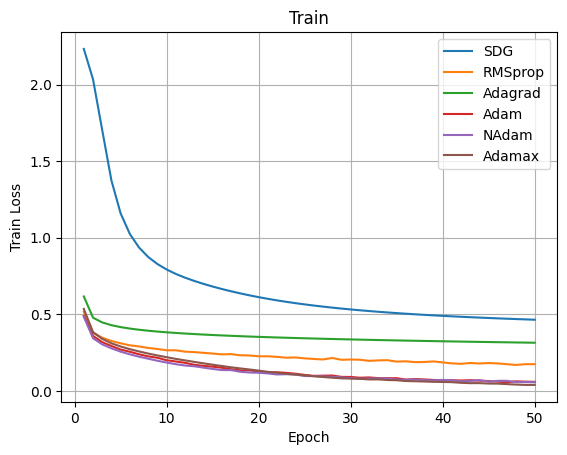

In [57]:
#Сравнение методов Тренировочный
from matplotlib import pyplot as plt

x = plt.axes()
x.set(title="Train", xlabel="Epoch", ylabel="Train Loss")
for key, item in result.items():
  # print(key, item)
  x.plot([i + 1 for i in range(epochs)], item[0], label=key)
x.grid()
x.legend()

plt.show()

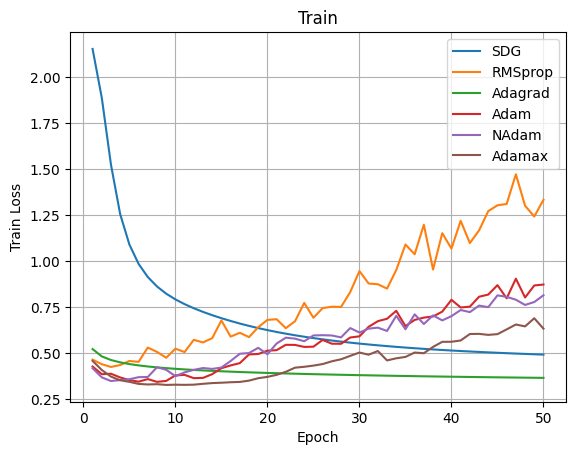

In [58]:
#Сравнение методов Тестовый
from matplotlib import pyplot as plt

x = plt.axes()
x.set(title="Train", xlabel="Epoch", ylabel="Train Loss")
for key, item in result.items():
    x.plot([i + 1 for i in range(epochs)], item[1], label=key)
x.grid()
x.legend()

plt.show()

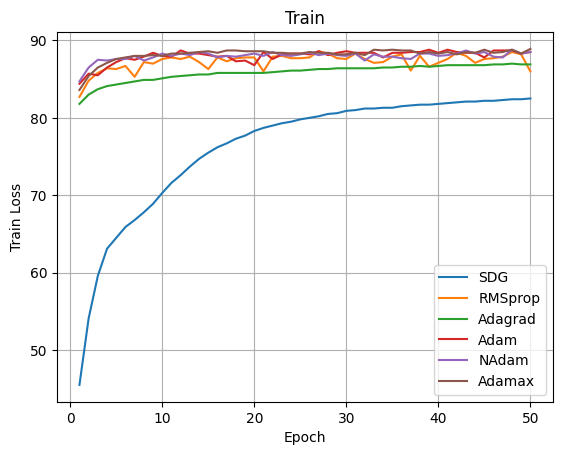

In [59]:
#Сравнение методов Оценка
from matplotlib import pyplot as plt

x = plt.axes()
x.set(title="Train", xlabel="Epoch", ylabel="Train Loss")
for key, item in result.items():
    x.plot([i + 1 for i in range(epochs)], item[2], label=key)
x.grid()
x.legend()

plt.show()

Самая большая скорость сходимости у методов Adam, NAdam, Adamax.

Самая маленькая скорость сходимости у метода SDG.

По второму графику можно сделать вывод, что методы RMSprop, Adam, NAdam, Adamax переобучились, поэтому их следует обучать меньше 50 эпох.

Adagrad самый лучший метод по итогу анализа полученных графиков.